In [10]:
# Import libraries/packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Import file
path_to_file =  "/content/drive/MyDrive/Technocolabs Softwares/prosperLoanData.csv"
df_exp_loanData  = pd.read_csv(path_to_file)

In [13]:
# Print first five rows of the dataset
df_exp_loanData.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [14]:
# Number of rows and columns of dataset
df_exp_loanData.shape

(113937, 81)

In [15]:
# A concise summary of the dataframe,including the number of non-null values in each colum
df_exp_loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

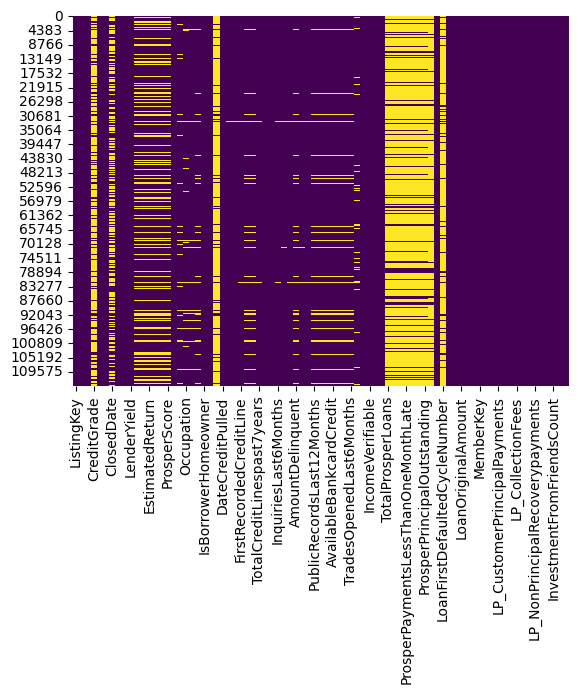

In [16]:
# Heat map of null values
sns.heatmap(df_exp_loanData.isnull(), cbar=False, cmap='viridis')
plt.show()

In [17]:
# Duplicate 'ListingKey'
df_exp_loanData[df_exp_loanData['ListingKey'].duplicated()].shape[0]

871

In [18]:
# Remove Dupliactes
df_exp_loanData.drop_duplicates(subset = 'ListingKey', inplace = True)

In [19]:
# Confirm
df_exp_loanData.ListingKey.duplicated().any()

False

In [20]:
# Check all null values
null_count = df_exp_loanData.isnull().sum()

# Iterate through the columns and print the null count for each one
for column, count in null_count.items():
    print(f"{column} : {count} nulls.")

ListingKey : 0 nulls.
ListingNumber : 0 nulls.
ListingCreationDate : 0 nulls.
CreditGrade : 84113 nulls.
Term : 0 nulls.
LoanStatus : 0 nulls.
ClosedDate : 57990 nulls.
BorrowerAPR : 25 nulls.
BorrowerRate : 0 nulls.
LenderYield : 0 nulls.
EstimatedEffectiveYield : 29084 nulls.
EstimatedLoss : 29084 nulls.
EstimatedReturn : 29084 nulls.
ProsperRating (numeric) : 29084 nulls.
ProsperRating (Alpha) : 29084 nulls.
ProsperScore : 29084 nulls.
ListingCategory (numeric) : 0 nulls.
BorrowerState : 5515 nulls.
Occupation : 3529 nulls.
EmploymentStatus : 2255 nulls.
EmploymentStatusDuration : 7625 nulls.
IsBorrowerHomeowner : 0 nulls.
CurrentlyInGroup : 0 nulls.
GroupKey : 99727 nulls.
DateCreditPulled : 0 nulls.
CreditScoreRangeLower : 591 nulls.
CreditScoreRangeUpper : 591 nulls.
FirstRecordedCreditLine : 697 nulls.
CurrentCreditLines : 7604 nulls.
OpenCreditLines : 7604 nulls.
TotalCreditLinespast7years : 697 nulls.
OpenRevolvingAccounts : 0 nulls.
OpenRevolvingMonthlyPayment : 0 nulls.
Inqu

# 1- Employment Status


In [21]:
# Using value_counts() to get the counts of unique values of EmploymentStatus
cont = df_exp_loanData['EmploymentStatus'].value_counts()
print(cont)

Employed         66598
Full-time        26354
Self-employed     6052
Not available     5347
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64


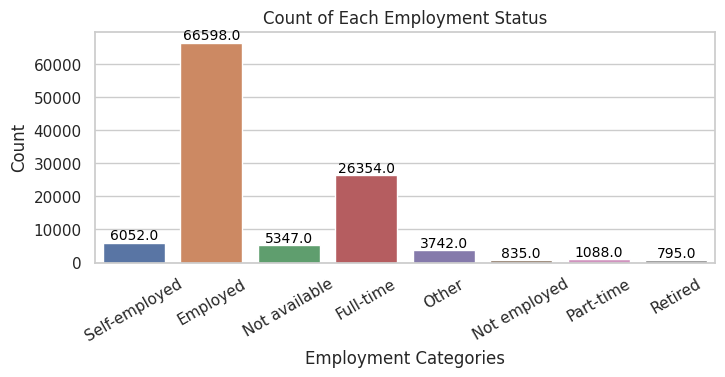

In [22]:
# Bar chart of EmploymentStatus

# df_exp_loanData['EmploymentStatus'].fillna('unknown', inplace=True)
sns.set(style="whitegrid")  # Set a style for the plot
plt.figure(figsize=(8, 3))  # Figure size (x-axis, y-axis)
ax = sns.countplot(x="EmploymentStatus", data=df_exp_loanData)
plt.xticks(rotation=30)  # Rotate x-axis labels
plt.title("Count of Each Employment Status")
plt.xlabel("Employment Categories")
plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", fontsize=10, color="black", xytext=(0, 5), textcoords="offset points")
plt.show()

In [23]:
# Check if there are nulls
df_exp_loanData['EmploymentStatus'].isnull().sum()

2255

In [24]:
# Replace Full-time as Employed
df_exp_loanData['EmploymentStatus'] = df_exp_loanData['EmploymentStatus'].replace('Full-time', 'Employed')


In [25]:
# Employment: Replace missing employment values with 'Not available'
df_exp_loanData['EmploymentStatus'] = df_exp_loanData['EmploymentStatus'].fillna('Not available')

In [26]:
# Check if there are nulls
df_exp_loanData['EmploymentStatus'].isnull().sum()

0

# 2- Handle ProsperScore

In [27]:
df_exp_loanData['ProsperScore'].unique()

array([nan,  7.,  9.,  4., 10.,  2.,  8.,  5.,  3.,  6., 11.,  1.])

In [28]:
# 11 occurs 1431 times
df_exp_loanData['ProsperScore'].value_counts()

4.0     12443
6.0     12161
8.0     11953
7.0     10489
5.0      9732
3.0      7565
9.0      6865
2.0      5706
10.0     4691
11.0     1431
1.0       946
Name: ProsperScore, dtype: int64

In [29]:
# Calculate the median of non-outlier values (excluding 11)
median_score = df_exp_loanData['ProsperScore'][df_exp_loanData['ProsperScore'] != 11].median()
median_score

6.0

In [30]:
# Replace the value "11" with the calculated median
df_exp_loanData['ProsperScore'] = df_exp_loanData['ProsperScore'].replace(11, median_score)

In [31]:
# Confim
df_exp_loanData.ProsperScore.unique()

array([nan,  7.,  9.,  4., 10.,  2.,  8.,  5.,  3.,  6.,  1.])

In [32]:
df_exp_loanData['ProsperScore'].isnull().sum()

29084

In [33]:
#df_exp_loanData['ProsperScore'].fillna('Not Given', inplace=True)

ProsperRating (Alpha)

In [34]:
df_exp_loanData['ProsperRating (Alpha)'].value_counts()

C     18096
B     15368
A     14390
D     14170
E      9716
HR     6917
AA     5325
Name: ProsperRating (Alpha), dtype: int64

In [35]:
df_exp_loanData['ProsperRating (Alpha)'].isnull().sum()

29084

In [36]:
# df_exp_loanData['ProsperRating (Alpha)'].fillna('Not Given', inplace=True)

ProsperRating (numeric)

In [37]:
df_exp_loanData['ProsperRating (numeric)'].value_counts()

4.0    18096
5.0    15368
6.0    14390
3.0    14170
2.0     9716
1.0     6917
7.0     5325
Name: ProsperRating (numeric), dtype: int64

In [38]:
df_exp_loanData['ProsperRating (numeric)'].isnull().sum()

29084

In [39]:
# df_exp_loanData['ProsperRating (numeric)'].fillna('Not Given', inplace=True)

# 3- Mapping
numerical codes into descriptive category labels

In [40]:
category_mapping = {
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby&Adoption',
    9: 'Boat',
    10: 'Cosmetic Procedure',
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans',
    }
df_exp_loanData['ListingCategory'] = df_exp_loanData['ListingCategory (numeric)'].map(category_mapping)
display(df_exp_loanData)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCategory
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,Not Available
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Home Improvement
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,Not Available
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,Motorcycle
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,Home Improvement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Debt Consolidation
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22,Other
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119,Debt Consolidation
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274,Home Improvement


In [41]:
# Check if there are nulls
df_exp_loanData['ListingCategory'].isnull().sum()

0

# 4- Loan Status

In [42]:
# Using value_counts() to get the counts of unique values
value_counts = df_exp_loanData['LoanStatus'].value_counts()
print(value_counts)

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64


In [43]:
# Check if there are nulls
df_exp_loanData['LoanStatus'].isnull().sum()

0

In [44]:
# Drop cancelled loans which are not created in the first place
drop_values = df_exp_loanData['LoanStatus'] == 'Cancelled'
display(drop_values)

0         False
1         False
2         False
3         False
4         False
          ...  
113932    False
113933    False
113934    False
113935    False
113936    False
Name: LoanStatus, Length: 113066, dtype: bool

In [45]:
df_exp_loanData.drop(df_exp_loanData[drop_values].index, inplace = True)

In [46]:
# Confirm. Get zero.
df_exp_loanData.query("LoanStatus == 'Cancelled'").shape[0]

0

# 5- Bianry Conversion

LoanCurrentDaysDelinquent

In [47]:
# Using value_counts() to get the counts of unique values
cont = df_exp_loanData['LoanCurrentDaysDelinquent'].value_counts()

for column, count in cont.items():
    print(f"{column} : {count} time exists ")

0 : 93994 time exists 
121 : 293 time exists 
10 : 190 time exists 
4 : 75 time exists 
11 : 61 time exists 
5 : 60 time exists 
3 : 58 time exists 
161 : 51 time exists 
6 : 51 time exists 
1 : 48 time exists 
12 : 47 time exists 
191 : 44 time exists 
192 : 41 time exists 
13 : 41 time exists 
181 : 40 time exists 
2 : 40 time exists 
100 : 38 time exists 
174 : 38 time exists 
160 : 38 time exists 
184 : 37 time exists 
154 : 36 time exists 
158 : 36 time exists 
152 : 36 time exists 
163 : 36 time exists 
215 : 36 time exists 
253 : 36 time exists 
195 : 36 time exists 
162 : 35 time exists 
145 : 35 time exists 
187 : 34 time exists 
151 : 34 time exists 
167 : 34 time exists 
166 : 33 time exists 
180 : 33 time exists 
193 : 33 time exists 
206 : 33 time exists 
210 : 33 time exists 
225 : 33 time exists 
1836 : 32 time exists 
157 : 32 time exists 
375 : 32 time exists 
200 : 31 time exists 
153 : 31 time exists 
224 : 31 time exists 
227 : 31 time exists 
168 : 31 time exists 


In [48]:
max(df_exp_loanData['LoanCurrentDaysDelinquent'])

2704

In [49]:
min(df_exp_loanData['LoanCurrentDaysDelinquent'])

0

In [50]:
# Check if there are nulls
df_exp_loanData['LoanCurrentDaysDelinquent'].isnull().sum()

0

In [51]:
# Create a function
def determine_status(LoanCurrentDaysDelinquent):
    if LoanCurrentDaysDelinquent > 180:
        return 1  # Defaulter
    else:
        return 0  # Not Defaulter

# Apply the function
df_exp_loanData['LoanCurrentDaysDelinquent_Status_n'] = df_exp_loanData['LoanCurrentDaysDelinquent'].apply(determine_status)

# Map 1 to "Defaulter" and 0 to "Not Defaulter"
df_exp_loanData['LoanCurrentDaysDelinquent_Status_a'] = df_exp_loanData['LoanCurrentDaysDelinquent_Status_n'].map({1: "Defaulter", 0: "Not Defaulter"})


In [52]:
select_column = df_exp_loanData[['ListingKey', 'LoanCurrentDaysDelinquent', 'LoanCurrentDaysDelinquent_Status_n',
                                 'LoanCurrentDaysDelinquent_Status_a']]
display(select_column)

,ListingKey,LoanCurrentDaysDelinquent,LoanCurrentDaysDelinquent_Status_n,LoanCurrentDaysDelinquent_Status_a
0,1021339766868145413AB3B,0,0,Not Defaulter
1,10273602499503308B223C1,0,0,Not Defaulter
2,0EE9337825851032864889A,0,0,Not Defaulter
3,0EF5356002482715299901A,0,0,Not Defaulter
4,0F023589499656230C5E3E2,0,0,Not Defaulter
...,...,...,...,...
113932,E6D9357655724827169606C,0,0,Not Defaulter
113933,E6DB353036033497292EE43,0,0,Not Defaulter
113934,E6E13596170052029692BB1,0,0,Not Defaulter
113935,E6EB3531504622671970D9E,0,0,Not Defaulter


ClosedDate

In [53]:
# Convert "ClosedDate" to datetime
df_exp_loanData['ClosedDate'] = pd.to_datetime(df_exp_loanData['ClosedDate'])

In [54]:
print(df_exp_loanData['ClosedDate'].dtype)

datetime64[ns]


In [55]:
min(df_exp_loanData['ClosedDate'])

Timestamp('2005-11-25 00:00:00')

In [56]:
max(df_exp_loanData['ClosedDate'])

Timestamp('2014-03-10 00:00:00')

In [57]:
df_exp_loanData["ClosedDate_Status_n"] = df_exp_loanData["ClosedDate"].apply(lambda x: 1 if pd.isnull(x) else 0)
print(df_exp_loanData["ClosedDate_Status_n"] )

0         0
1         1
2         0
3         1
4         1
         ..
113932    1
113933    1
113934    1
113935    0
113936    1
Name: ClosedDate_Status_n, Length: 113061, dtype: int64


In [58]:
df_exp_loanData['ClosedDate_Status_a'] = df_exp_loanData['ClosedDate_Status_n'].map({1: "Loan Not closed", 0: "Loan Closed"})

In [59]:
select_column = df_exp_loanData[['ListingKey', 'LoanStatus','LoanCurrentDaysDelinquent', 'LoanCurrentDaysDelinquent_Status_n',
                                 'LoanCurrentDaysDelinquent_Status_a', 'ClosedDate_Status_n', 'ClosedDate_Status_a']]
display(select_column)

,ListingKey,LoanStatus,LoanCurrentDaysDelinquent,LoanCurrentDaysDelinquent_Status_n,LoanCurrentDaysDelinquent_Status_a,ClosedDate_Status_n,ClosedDate_Status_a
0,1021339766868145413AB3B,Completed,0,0,Not Defaulter,0,Loan Closed
1,10273602499503308B223C1,Current,0,0,Not Defaulter,1,Loan Not closed
2,0EE9337825851032864889A,Completed,0,0,Not Defaulter,0,Loan Closed
3,0EF5356002482715299901A,Current,0,0,Not Defaulter,1,Loan Not closed
4,0F023589499656230C5E3E2,Current,0,0,Not Defaulter,1,Loan Not closed
...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,Current,0,0,Not Defaulter,1,Loan Not closed
113933,E6DB353036033497292EE43,FinalPaymentInProgress,0,0,Not Defaulter,1,Loan Not closed
113934,E6E13596170052029692BB1,Current,0,0,Not Defaulter,1,Loan Not closed
113935,E6EB3531504622671970D9E,Completed,0,0,Not Defaulter,0,Loan Closed


In [60]:
# Check and filter data
filtered_df = select_column[(select_column["LoanStatus"] == "FinalPaymentInProgress") & (select_column["ClosedDate_Status_n"] == 1 )]
display(filtered_df)

,ListingKey,LoanStatus,LoanCurrentDaysDelinquent,LoanCurrentDaysDelinquent_Status_n,LoanCurrentDaysDelinquent_Status_a,ClosedDate_Status_n,ClosedDate_Status_a
1281,44D0357906158016410A702,FinalPaymentInProgress,0,0,Not Defaulter,1,Loan Not closed
2160,287335868517070214398AA,FinalPaymentInProgress,0,0,Not Defaulter,1,Loan Not closed
2554,4107354728069052899026A,FinalPaymentInProgress,0,0,Not Defaulter,1,Loan Not closed
2744,5EF735092929240660CFCAA,FinalPaymentInProgress,0,0,Not Defaulter,1,Loan Not closed
3071,8E2B3542125245135B0643D,FinalPaymentInProgress,0,0,Not Defaulter,1,Loan Not closed
...,...,...,...,...,...,...,...
111649,CB2F3599752175252FD4B8A,FinalPaymentInProgress,0,0,Not Defaulter,1,Loan Not closed
112933,E49F3584527953577BD17EE,FinalPaymentInProgress,0,0,Not Defaulter,1,Loan Not closed
113316,DEAB3528199621310C8F19F,FinalPaymentInProgress,0,0,Not Defaulter,1,Loan Not closed
113746,C4B43574781104519DCA763,FinalPaymentInProgress,0,0,Not Defaulter,1,Loan Not closed


# 6- Income Range

In [61]:
df_exp_loanData['IncomeRange'].isnull().sum()

0

In [62]:
value_counts = df_exp_loanData['IncomeRange'].value_counts()
print(value_counts)

$25,000-49,999    31939
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
Not displayed      7737
$1-24,999          7241
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64


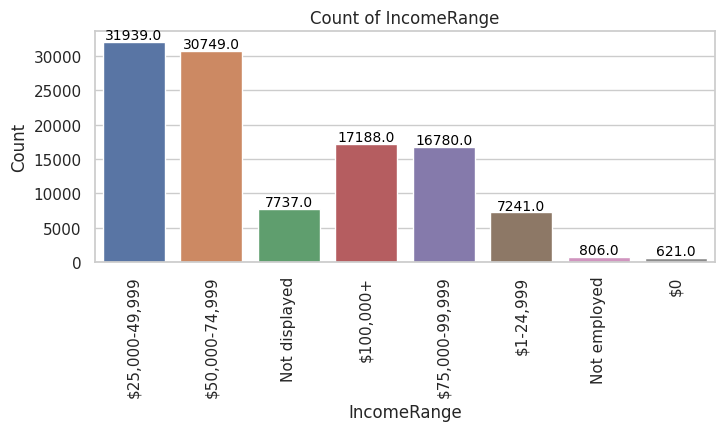

In [63]:
# Bar chart of IncomeRange
sns.set(style="whitegrid")  # Set a style for the plot
plt.figure(figsize=(8, 3))  # Figure size (x-axis, y-axis)
ax = sns.countplot(x="IncomeRange", data=df_exp_loanData)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Count of IncomeRange")
plt.xlabel("IncomeRange")
plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", fontsize=10, color="black", xytext=(0, 5), textcoords="offset points")
plt.show()

In [64]:
min(df_exp_loanData['StatedMonthlyIncome'])

0.0

In [65]:
max(df_exp_loanData['StatedMonthlyIncome'])

1750002.916667

In [66]:
filtered_data = df_exp_loanData[(df_exp_loanData['StatedMonthlyIncome'] >= 0) & (df_exp_loanData['StatedMonthlyIncome'] <= 1)]
count = filtered_data.shape[0]
print(count)

1646


In [67]:
bins = [0, 1, 25000, 50000, 75000, 100000, float('inf')]
labels = ['Unemployed', 'Lower', 'Lower_Middle', 'Middle', 'Upper_Middle', 'High']

df_exp_loanData['MonthlyInc_Range'] = pd.cut(df_exp_loanData['StatedMonthlyIncome'], bins=bins, labels=labels, include_lowest=True, right=False)
display(df_exp_loanData)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCategory,LoanCurrentDaysDelinquent_Status_n,LoanCurrentDaysDelinquent_Status_a,ClosedDate_Status_n,ClosedDate_Status_a,MonthlyInc_Range
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,...,0,0,0.0,258,Not Available,0,Not Defaulter,0,Loan Closed,Lower
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaT,0.12016,0.0920,0.0820,...,0,0,0.0,1,Home Improvement,0,Not Defaulter,1,Loan Not closed,Lower
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,...,0,0,0.0,41,Not Available,0,Not Defaulter,0,Loan Closed,Lower
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaT,0.12528,0.0974,0.0874,...,0,0,0.0,158,Motorcycle,0,Not Defaulter,1,Loan Not closed,Lower
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaT,0.24614,0.2085,0.1985,...,0,0,0.0,20,Home Improvement,0,Not Defaulter,1,Loan Not closed,Lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaT,0.22354,0.1864,0.1764,...,0,0,0.0,1,Debt Consolidation,0,Not Defaulter,1,Loan Not closed,Lower
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaT,0.13220,0.1110,0.1010,...,0,0,0.0,22,Other,0,Not Defaulter,1,Loan Not closed,Lower
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaT,0.23984,0.2150,0.2050,...,0,0,0.0,119,Debt Consolidation,0,Not Defaulter,1,Loan Not closed,Lower
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13,0.28408,0.2605,0.2505,...,0,0,0.0,274,Home Improvement,0,Not Defaulter,0,Loan Closed,Lower


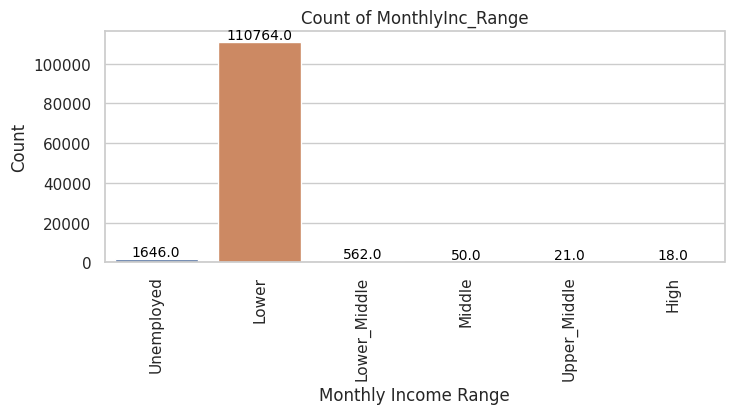

In [68]:
# Bar chart of MonthlyInc_Range
sns.set(style="whitegrid")  # Set a style for the plot
plt.figure(figsize=(8, 3))  # Figure size (x-axis, y-axis)
ax = sns.countplot(x="MonthlyInc_Range", data=df_exp_loanData)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Count of MonthlyInc_Range")
plt.xlabel("Monthly Income Range")
plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", fontsize=10, color="black", xytext=(0, 5), textcoords="offset points")
plt.show()

In [69]:
select_col = df_exp_loanData[['StatedMonthlyIncome', 'MonthlyInc_Range']]
display(select_col)

,StatedMonthlyIncome,MonthlyInc_Range
0,3083.333333,Lower
1,6125.000000,Lower
2,2083.333333,Lower
3,2875.000000,Lower
4,9583.333333,Lower
...,...,...
113932,4333.333333,Lower
113933,8041.666667,Lower
113934,2875.000000,Lower
113935,3875.000000,Lower


# 7- Occupation

In [70]:
value_counts = df_exp_loanData['Occupation'].value_counts()
print(value_counts)

Other                          28421
Professional                   13531
Computer Programmer             4442
Executive                       4280
Teacher                         3729
                               ...  
Dentist                           67
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64


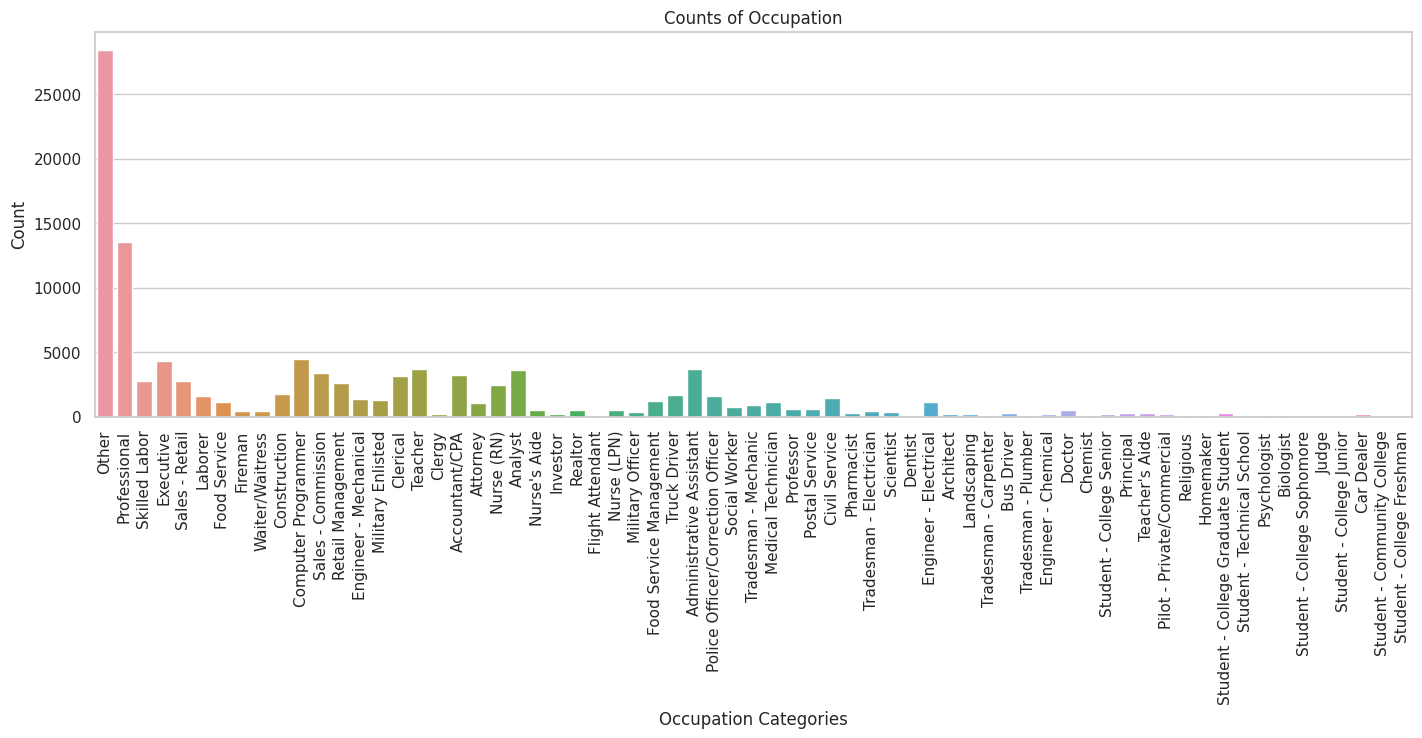

In [71]:
# Bar chart of Occupation
sns.set(style="whitegrid")  # Set a style for the plot
plt.figure(figsize=(17, 5))  # Figure size (x-axis, y-axis)
ax = sns.countplot(x="Occupation", data=df_exp_loanData)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Counts of Occupation")
plt.xlabel("Occupation Categories")
plt.ylabel("Count")
plt.show()

In [72]:
null_counts = df_exp_loanData['Occupation'].isnull().sum()
print(null_counts)

3526


In [73]:
df_exp_loanData['Occupation'].fillna('unknown', inplace=True)

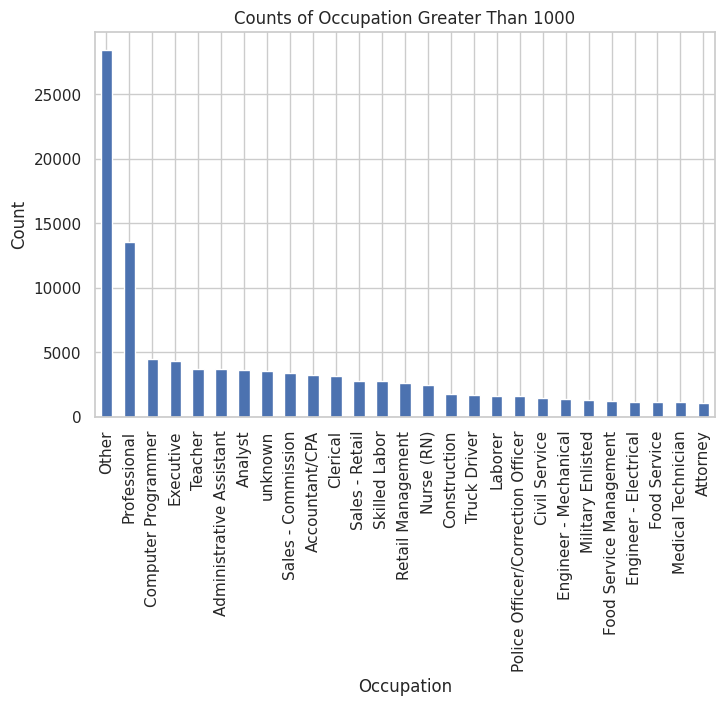

In [74]:
value_counts = df_exp_loanData['Occupation'].value_counts()
counts_greater_than_1000 = value_counts[value_counts > 1000]
plt.figure(figsize=(8, 5))
counts_greater_than_1000.plot(kind='bar')
plt.title('Counts of Occupation Greater Than 1000')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

# 8- Debt to Income

In [75]:
null_cnt = df_exp_loanData['DebtToIncomeRatio'].isnull().sum()
print(null_cnt)

8472


In [76]:
df_exp_loanData['DebtToIncomeRatio'] = df_exp_loanData['DebtToIncomeRatio'].fillna(df_exp_loanData['DebtToIncomeRatio'].mean())

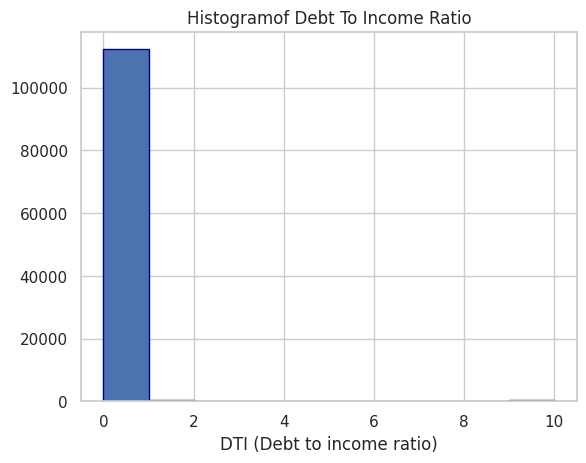

In [77]:
# Plotting histogram
plt.hist(x='DebtToIncomeRatio',data=df_exp_loanData, edgecolor='darkblue')
plt.title('Histogramof Debt To Income Ratio')
plt.xlabel('DTI (Debt to income ratio)');

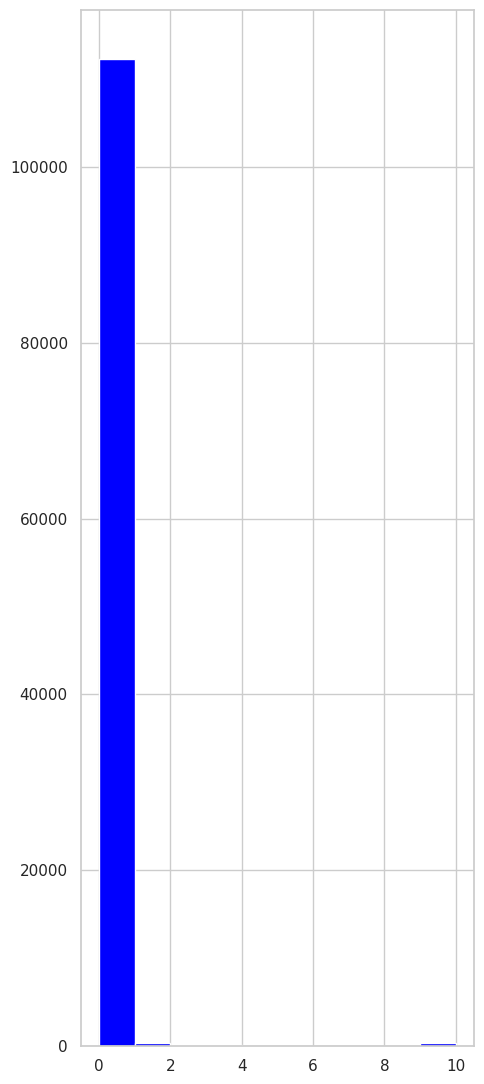

In [78]:
# Outlier can be see clearly in this diagram
df_exp_loanData['DebtToIncomeRatio'].hist(figsize=(5,11), color= 'blue')
plt.tight_layout()
plt.show()

In [79]:
z_scores = stats.zscore(df_exp_loanData['DebtToIncomeRatio'])
print(z_scores)

0        -0.199096
1        -0.180320
2        -0.405631
3        -0.236648
4        -0.030112
            ...   
113932   -0.274200
113933   -0.311752
113934    0.439286
113935    0.382958
113936   -0.086440
Name: DebtToIncomeRatio, Length: 113061, dtype: float64


In [80]:
max(z_scores)

18.27643811819926

In [81]:
min(z_scores)

-0.5182871595779847

In [82]:
DebtToIncomeRatio_threshold = 3

In [83]:
DebtToIncomeRatio_outlier_mask = (df_exp_loanData['DebtToIncomeRatio'] < DebtToIncomeRatio_threshold)

In [84]:
New_DebtToIncomeRatio = df_exp_loanData[DebtToIncomeRatio_outlier_mask]

(array([1.1918e+04, 3.2651e+04, 3.7814e+04, 1.7531e+04, 7.4700e+03,
        2.9890e+03, 9.9400e+02, 4.6600e+02, 2.5500e+02, 1.6100e+02,
        9.8000e+01, 6.0000e+01, 4.6000e+01, 2.6000e+01, 2.5000e+01,
        2.3000e+01, 1.3000e+01, 1.4000e+01, 1.5000e+01, 1.3000e+01,
        7.0000e+00, 8.0000e+00, 1.0000e+01, 1.0000e+01, 7.0000e+00,
        6.0000e+00, 7.0000e+00, 7.0000e+00, 2.0000e+00, 6.0000e+00]),
 array([0.        , 0.09966667, 0.19933333, 0.299     , 0.39866667,
        0.49833333, 0.598     , 0.69766667, 0.79733333, 0.897     ,
        0.99666667, 1.09633333, 1.196     , 1.29566667, 1.39533333,
        1.495     , 1.59466667, 1.69433333, 1.794     , 1.89366667,
        1.99333333, 2.093     , 2.19266667, 2.29233333, 2.392     ,
        2.49166667, 2.59133333, 2.691     , 2.79066667, 2.89033333,
        2.99      ]),
 <BarContainer object of 30 artists>)

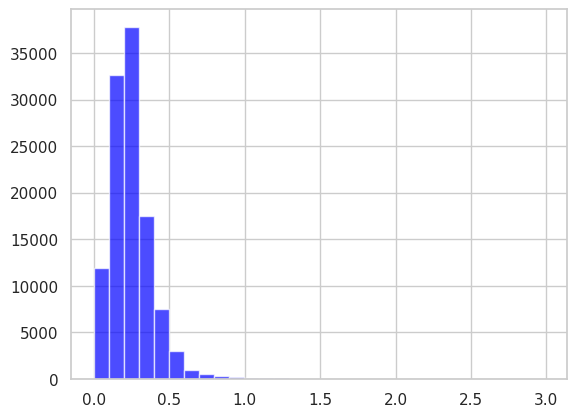

In [85]:
plt.hist(New_DebtToIncomeRatio['DebtToIncomeRatio'], bins=30, color='blue', alpha=0.7)

In [86]:
display(New_DebtToIncomeRatio)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCategory,LoanCurrentDaysDelinquent_Status_n,LoanCurrentDaysDelinquent_Status_a,ClosedDate_Status_n,ClosedDate_Status_a,MonthlyInc_Range
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,...,0,0,0.0,258,Not Available,0,Not Defaulter,0,Loan Closed,Lower
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaT,0.12016,0.0920,0.0820,...,0,0,0.0,1,Home Improvement,0,Not Defaulter,1,Loan Not closed,Lower
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,...,0,0,0.0,41,Not Available,0,Not Defaulter,0,Loan Closed,Lower
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaT,0.12528,0.0974,0.0874,...,0,0,0.0,158,Motorcycle,0,Not Defaulter,1,Loan Not closed,Lower
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaT,0.24614,0.2085,0.1985,...,0,0,0.0,20,Home Improvement,0,Not Defaulter,1,Loan Not closed,Lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaT,0.22354,0.1864,0.1764,...,0,0,0.0,1,Debt Consolidation,0,Not Defaulter,1,Loan Not closed,Lower
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaT,0.13220,0.1110,0.1010,...,0,0,0.0,22,Other,0,Not Defaulter,1,Loan Not closed,Lower
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaT,0.23984,0.2150,0.2050,...,0,0,0.0,119,Debt Consolidation,0,Not Defaulter,1,Loan Not closed,Lower
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13,0.28408,0.2605,0.2505,...,0,0,0.0,274,Home Improvement,0,Not Defaulter,0,Loan Closed,Lower


# 9- Borrower APR

In [87]:
null_val = df_exp_loanData['BorrowerAPR'].isnull().sum()
print(null_val)

25


In [88]:
df_exp_loanData['BorrowerAPR'] = df_exp_loanData['BorrowerAPR'].fillna(df_exp_loanData['BorrowerAPR'].mean())

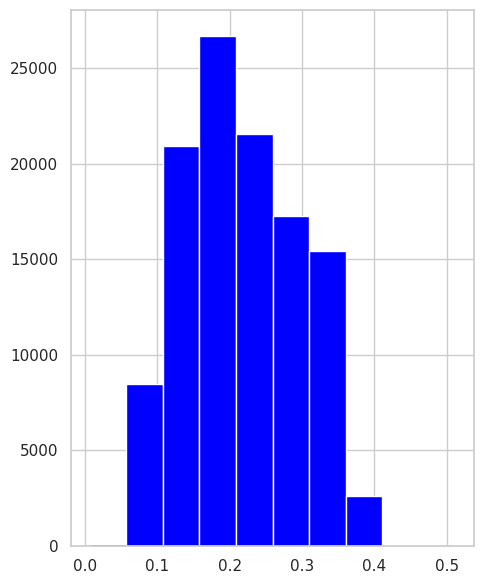

In [89]:
df_exp_loanData['BorrowerAPR'].hist(figsize=(5,6), color= 'blue')
plt.tight_layout()
plt.show()

# 10- Borrower Rate

In [90]:
null_value = df_exp_loanData['BorrowerRate'].isnull().sum()
print(null_value)

0


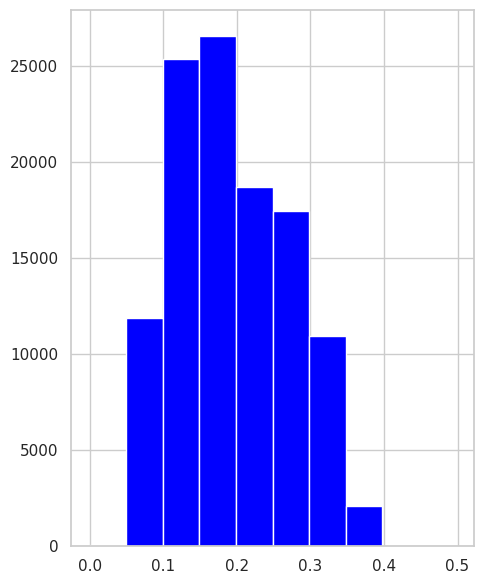

In [91]:
df_exp_loanData['BorrowerRate'].hist(figsize=(5,6), color= 'blue')
plt.tight_layout()
plt.show()

# 11- Is Home Owner

In [92]:
cnt_values = df_exp_loanData['IsBorrowerHomeowner'].value_counts()
print(cnt_values)

True     57050
False    56011
Name: IsBorrowerHomeowner, dtype: int64


In [93]:
null_v = df_exp_loanData['IsBorrowerHomeowner'].isnull().sum()
print(null_v)

0


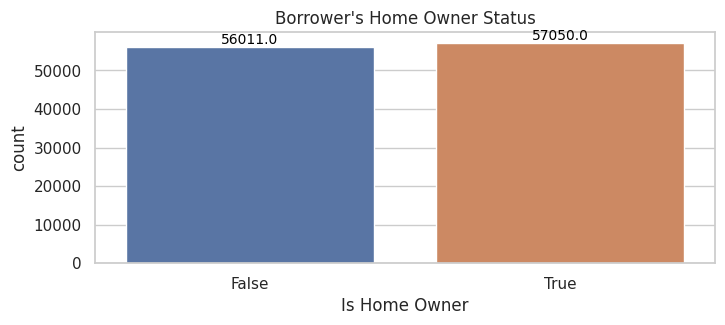

In [94]:
# Bar chart of Home Owner Status
sns.set(style="whitegrid")
plt.figure(figsize=(8, 3))
ax = sns.countplot(x="IsBorrowerHomeowner", data=df_exp_loanData)
plt.title("Borrower's Home Owner Status")
plt.xlabel("Is Home Owner")
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", fontsize=10, color="black", xytext=(0, 5), textcoords="offset points")
plt.show()

# 12- Monthly income to borrower APR

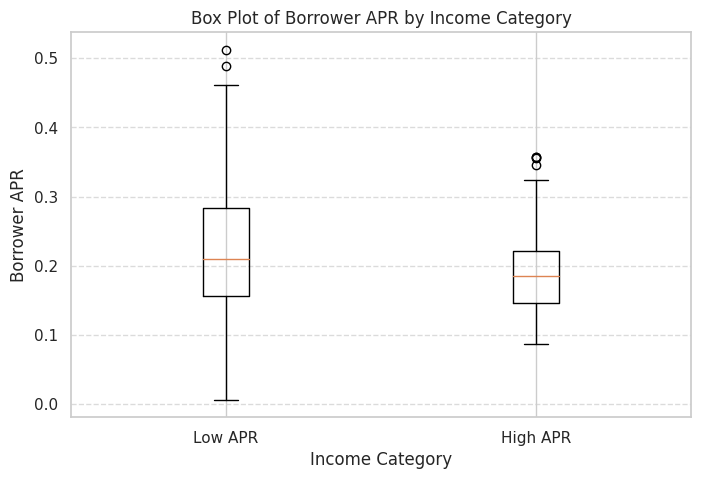

In [95]:
condition_low_income = (df_exp_loanData['StatedMonthlyIncome'] > 0) & (df_exp_loanData['StatedMonthlyIncome'] <= 50000)
condition_high_income = (df_exp_loanData['StatedMonthlyIncome'] > 50000) & (df_exp_loanData['StatedMonthlyIncome'] <= 100000)

# Create a box plot
plt.figure(figsize=(8, 5))
plt.title('Box Plot of Borrower APR by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Borrower APR')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.boxplot([
    df_exp_loanData[condition_low_income]['BorrowerAPR'],
    df_exp_loanData[condition_high_income]['BorrowerAPR']
], labels=['Low APR', 'High APR'])
plt.show()

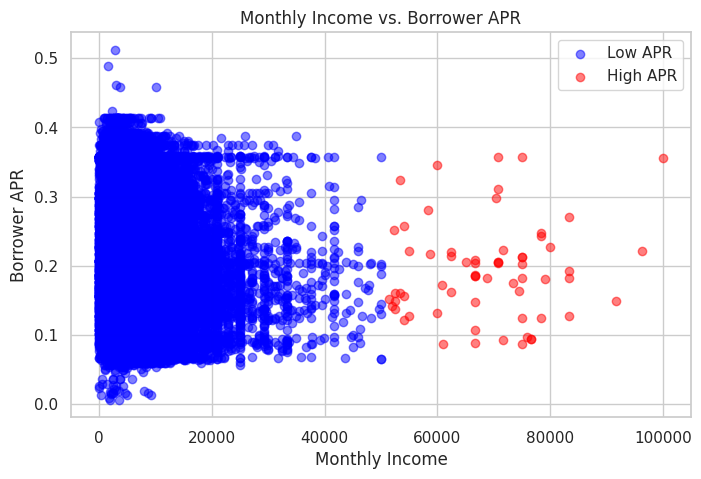

In [96]:
# Define conditions to separate data into categories
condition_low_income = (df_exp_loanData['StatedMonthlyIncome'] > 0) & (df_exp_loanData['StatedMonthlyIncome'] <= 50000)
condition_high_income = (df_exp_loanData['StatedMonthlyIncome'] > 50000) & (df_exp_loanData['StatedMonthlyIncome'] <= 100000)

# Create a scatter plot
plt.figure(figsize=(8, 5))
plt.title('Monthly Income vs. Borrower APR')
plt.xlabel('Monthly Income')
plt.ylabel('Borrower APR')

# Plot data points for low income
plt.scatter(
    df_exp_loanData[condition_low_income]['StatedMonthlyIncome'],
    df_exp_loanData[condition_low_income]['BorrowerAPR'],
    label='Low APR',
    color='blue',
    alpha=0.5
)

# Plot data points for high income
plt.scatter(
    df_exp_loanData[condition_high_income]['StatedMonthlyIncome'],
    df_exp_loanData[condition_high_income]['BorrowerAPR'],
    label='High APR',
    color='red',
    alpha=0.5
)

plt.legend()
plt.show()

# 13- loan org amount to monthly loan payment

In [97]:
min(df_exp_loanData['LoanOriginalAmount'])

1000

In [98]:
max(df_exp_loanData['LoanOriginalAmount'])

35000

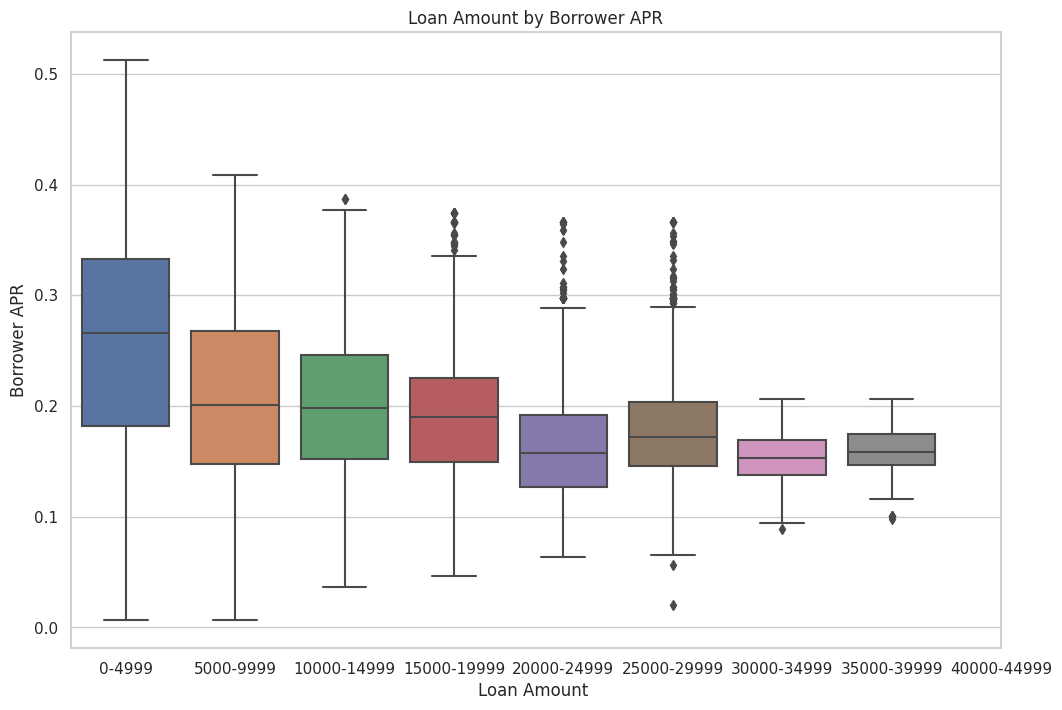

In [99]:
# Create bins for LoanOriginalAmount
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000]

plt.figure(figsize=(12, 8))

# Use pd.cut to discretize LoanOriginalAmount into custom bins
df_exp_loanData['AmountRange'] = pd.cut(df_exp_loanData['LoanOriginalAmount'], bins=bins, labels=False, right=False)

# Create a boxplot with custom bins
sns.boxplot(x='AmountRange', y='BorrowerAPR', data=df_exp_loanData)

# Customize plot labels and title
plt.title('Loan Amount by Borrower APR')
plt.xlabel('Loan Amount ')
plt.ylabel('Borrower APR')

# Add x-axis labels based on the bin edges
plt.xticks(range(len(bins) - 1), [f'{bins[i]}-{bins[i + 1] - 1}' for i in range(len(bins) - 1)])

plt.show()


### Research Question 1 : What are the most number of borrowers Credit Grade?

In [100]:
display(df_exp_loanData)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCategory,LoanCurrentDaysDelinquent_Status_n,LoanCurrentDaysDelinquent_Status_a,ClosedDate_Status_n,ClosedDate_Status_a,MonthlyInc_Range,AmountRange
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,...,0,0.0,258,Not Available,0,Not Defaulter,0,Loan Closed,Lower,1
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaT,0.12016,0.0920,0.0820,...,0,0.0,1,Home Improvement,0,Not Defaulter,1,Loan Not closed,Lower,2
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,...,0,0.0,41,Not Available,0,Not Defaulter,0,Loan Closed,Lower,0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaT,0.12528,0.0974,0.0874,...,0,0.0,158,Motorcycle,0,Not Defaulter,1,Loan Not closed,Lower,2
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaT,0.24614,0.2085,0.1985,...,0,0.0,20,Home Improvement,0,Not Defaulter,1,Loan Not closed,Lower,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaT,0.22354,0.1864,0.1764,...,0,0.0,1,Debt Consolidation,0,Not Defaulter,1,Loan Not closed,Lower,2
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaT,0.13220,0.1110,0.1010,...,0,0.0,22,Other,0,Not Defaulter,1,Loan Not closed,Lower,0
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaT,0.23984,0.2150,0.2050,...,0,0.0,119,Debt Consolidation,0,Not Defaulter,1,Loan Not closed,Lower,2
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13,0.28408,0.2605,0.2505,...,0,0.0,274,Home Improvement,0,Not Defaulter,0,Loan Closed,Lower,3


In [101]:
# Fill null values
df_exp_loanData['CreditGrade'].fillna(df_exp_loanData['CreditGrade'].mode()[0], inplace=True)

In [102]:
df_exp_loanData['CreditGrade'].isnull().mean()*100

0.0

In [103]:
credit_grade_counts = df_exp_loanData['CreditGrade'].value_counts()
print(credit_grade_counts)

C     89761
D      5153
B      4389
AA     3509
HR     3505
A      3314
E      3289
NC      141
Name: CreditGrade, dtype: int64


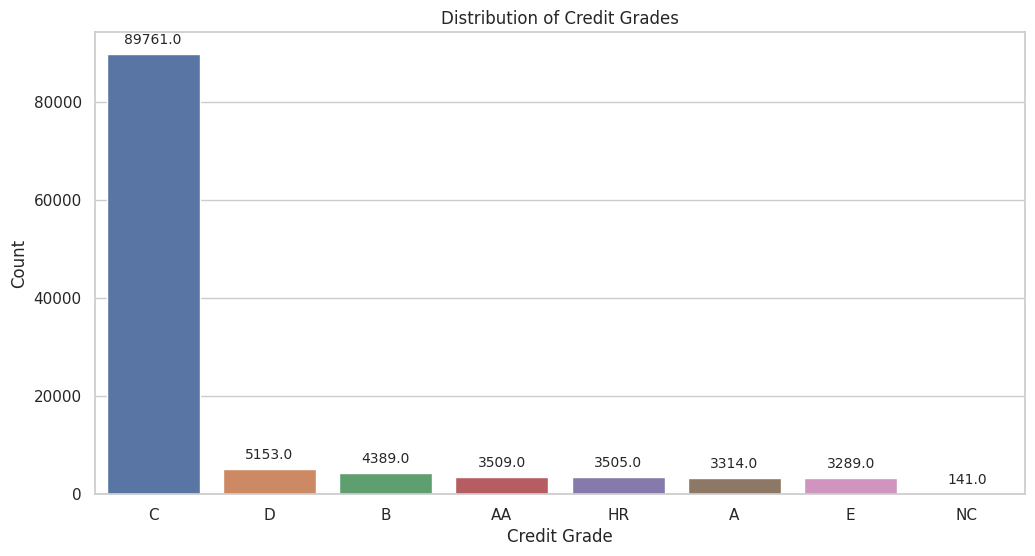

In [104]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='CreditGrade', data=df_exp_loanData, order=df_exp_loanData['CreditGrade'].value_counts().index)
plt.title('Distribution of Credit Grades')
plt.xlabel('Credit Grade')
plt.ylabel('Count')

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

People with C credit Grade mostly apply for prosper loan.

### Research Question 2 : Since there are so much low Credit Grade such as C and D , does it lead to a higher amount of deliquency?

In [105]:
value_counts = df_exp_loanData['LoanStatus'].value_counts()
print(value_counts)

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64


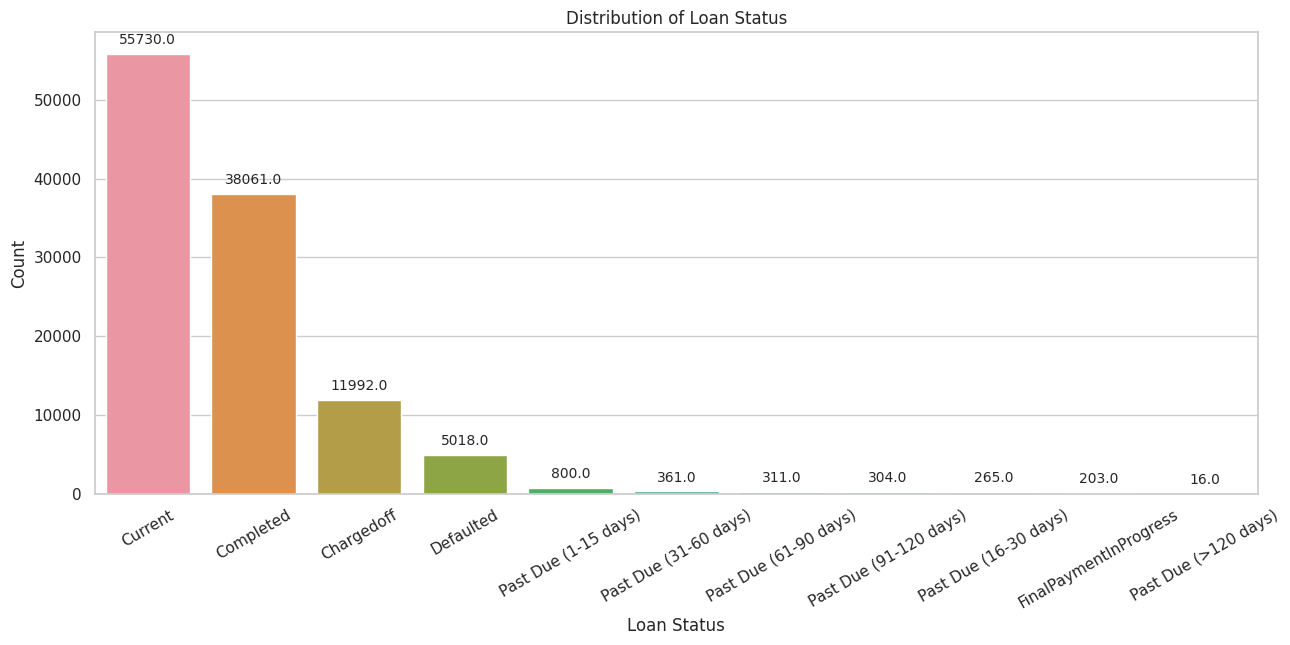

In [106]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='LoanStatus', data=df_exp_loanData, order=df_exp_loanData['LoanStatus'].value_counts().index)
plt.title('Distribution of Loan Status')
plt.xticks(rotation=30)
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

<Axes: xlabel='CreditGrade', ylabel='count'>

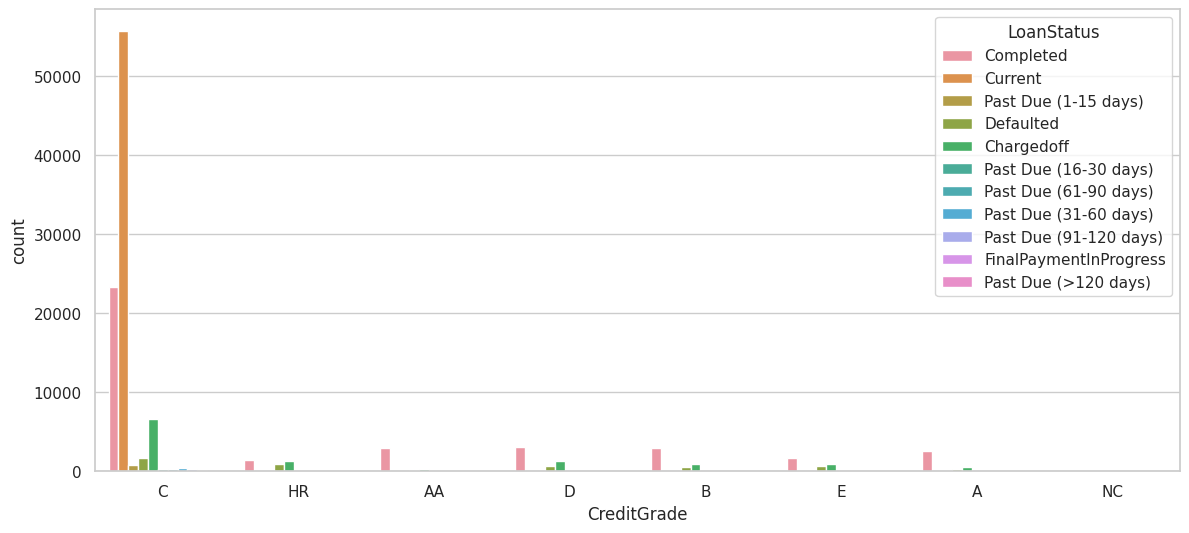

In [107]:
plt.figure(figsize=(14, 6))
sns.countplot(data= df_exp_loanData, x= 'CreditGrade', hue='LoanStatus')

Though there is higher amount of C Credit Grade but it has high amount of complete loans.

### Research Question 3 : What is the highest number of BorrowerRate?

In [108]:
null_value = df_exp_loanData['BorrowerRate'].isnull().sum()
print(null_value)

0


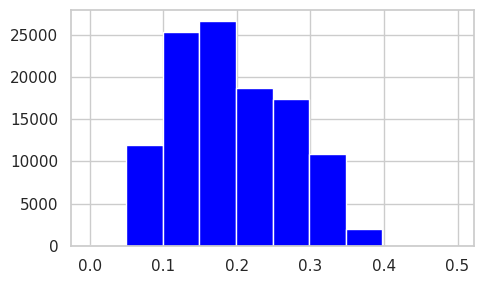

In [109]:
df_exp_loanData['BorrowerRate'].hist(figsize=(5,3), color= 'blue')
plt.tight_layout()
plt.show()

The highest number of Borrower Rate is between 0.1 and 0.2

### Research Question 4 : Since the highest number of Borrower Rate is between 0.1 and 0.2, does the highest number of Lender Yield is between 0.1 and 0.2?

In [110]:
null_value = df_exp_loanData['LenderYield'].isnull().sum()
print(null_value)

0


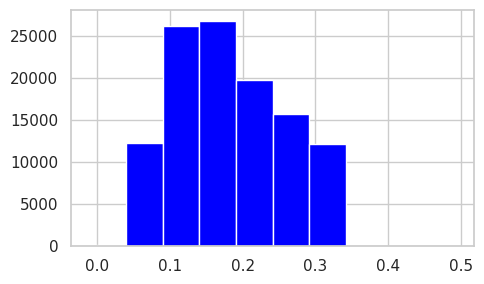

In [111]:
df_exp_loanData['LenderYield'].hist(figsize=(5,3), color= 'blue')
plt.tight_layout()
plt.show()

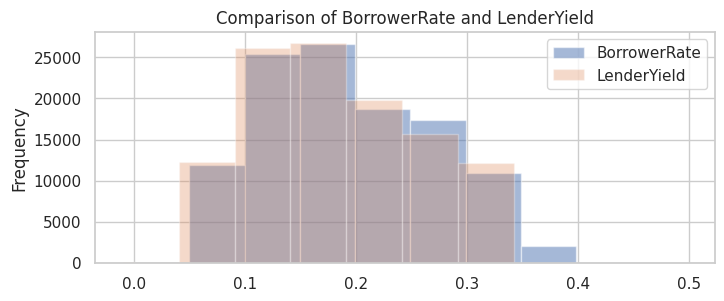

In [112]:
plt.figure(figsize=(8, 3))
plt.hist(df_exp_loanData['BorrowerRate'], alpha=0.5, label='BorrowerRate')
plt.hist(df_exp_loanData['LenderYield'],  alpha=0.3, label='LenderYield')
plt.title('Comparison of BorrowerRate and LenderYield')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Since the highest number of Borrower Rate is between 0.1 and 0.2, the highest number of Lender Yield is also between 0.1 and 0.2.

### Research Question 5 : Is the Credit Grade really accurate? Does higher Credit Grade leads to higher Monthly Loan Payment? As for Higher Credit Grade we mean from Grade AA to B

In [113]:
min(df_exp_loanData['MonthlyLoanPayment'])

0.0

In [114]:
max(df_exp_loanData['MonthlyLoanPayment'])

2251.51

<Axes: xlabel='CreditGrade', ylabel='MonthlyLoanPayment'>

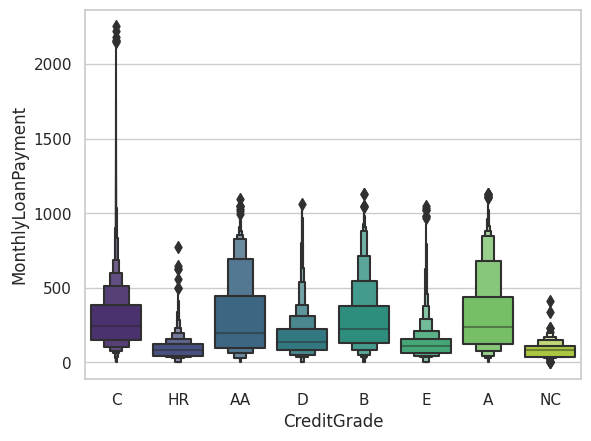

In [115]:
sns.boxenplot(x='CreditGrade', y='MonthlyLoanPayment', data=df_exp_loanData, palette='viridis')

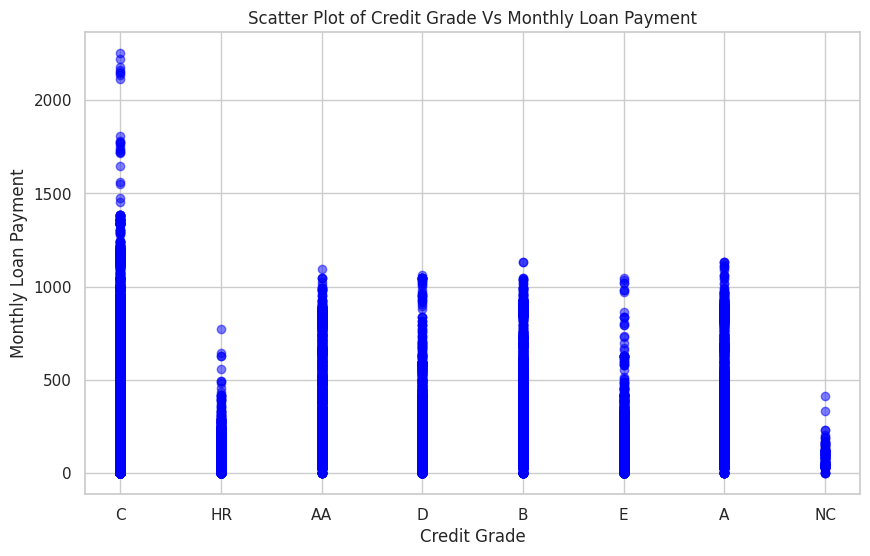

In [116]:
plt.figure(figsize=(10, 6))
plt.scatter(df_exp_loanData['CreditGrade'], df_exp_loanData['MonthlyLoanPayment'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Credit Grade Vs Monthly Loan Payment')
plt.xlabel('Credit Grade')
plt.ylabel('Monthly Loan Payment')
plt.show()

AA and B leads to average Monthly Loan Payment, where as C has high monthly loan payment

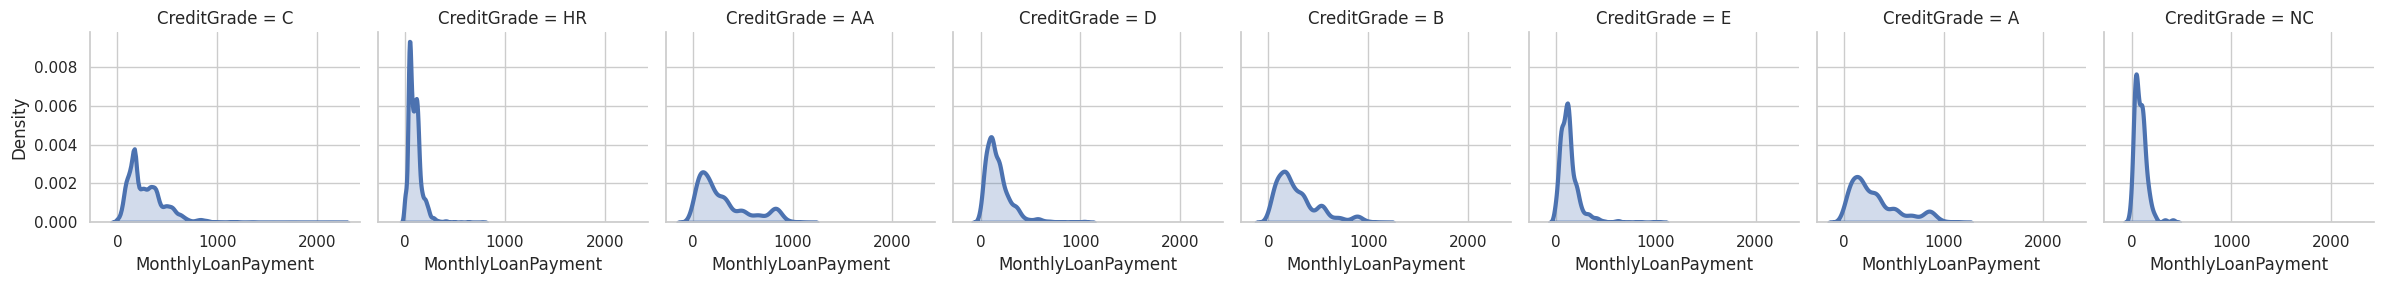

In [117]:
g = sns.FacetGrid(df_exp_loanData, col = 'CreditGrade')
g.map(sns.kdeplot, 'MonthlyLoanPayment', lw=3 , fill= True)

In [118]:
type(g)

seaborn.axisgrid.FacetGrid

### Research Question 6 : Here we look at the Completed Loan Status and Defaulted Rate to determine the accuracy of Credit Grade.

<Axes: xlabel='CreditGrade', ylabel='count'>

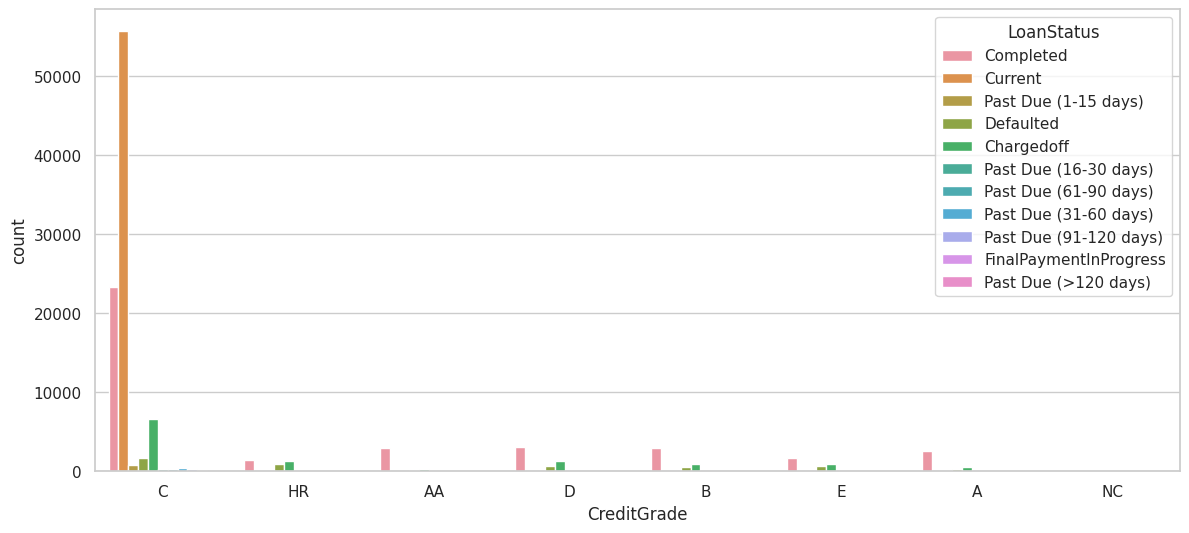

In [119]:
plt.figure(figsize=(14, 6))
sns.countplot(data= df_exp_loanData, x= 'CreditGrade', hue='LoanStatus')

<Axes: xlabel='CreditGrade', ylabel='count'>

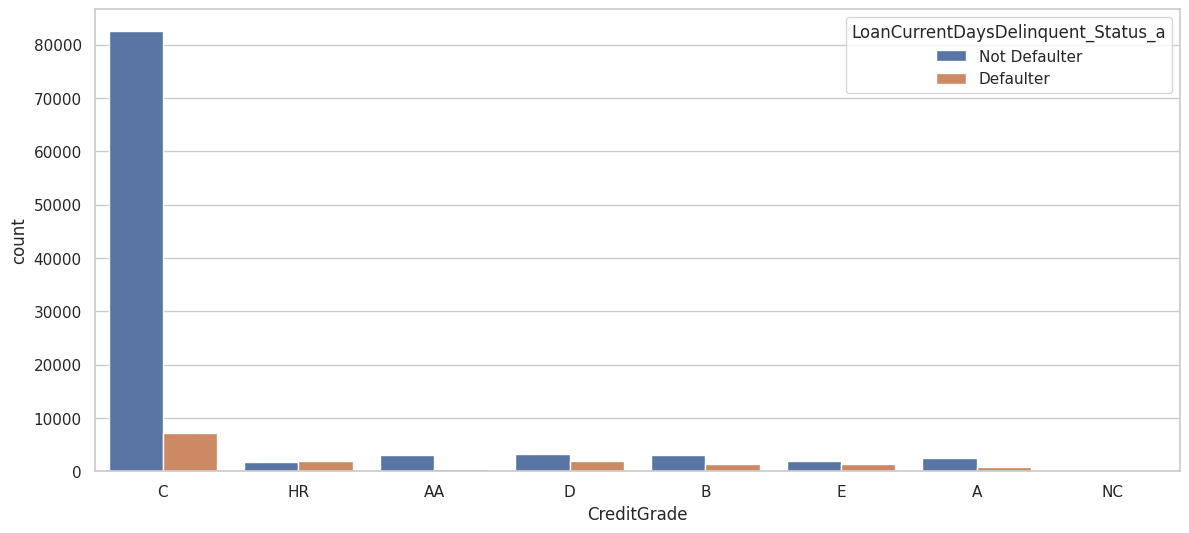

In [120]:
plt.figure(figsize=(14, 6))
sns.countplot(data= df_exp_loanData, x= 'CreditGrade', hue='LoanCurrentDaysDelinquent_Status_a')

C has high number of non defaulter.

<Axes: xlabel='CreditGrade', ylabel='count'>

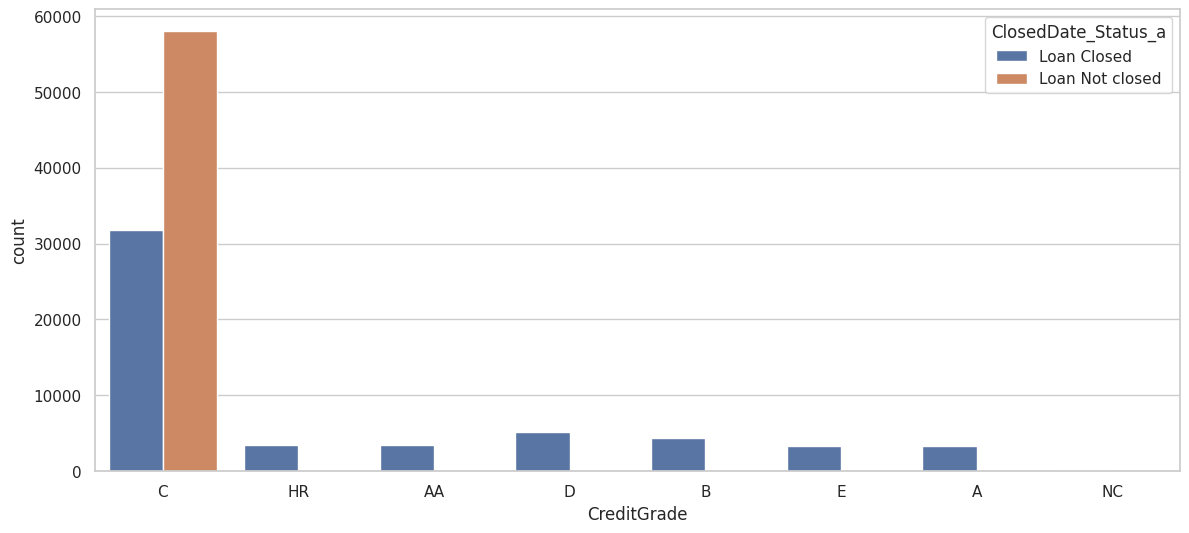

In [121]:
plt.figure(figsize=(14, 6))
sns.countplot(data= df_exp_loanData, x= 'CreditGrade', hue='ClosedDate_Status_a')

C has higher number of open loans

### Research Question 7 : Now we know the Credit Grade is accurate and is a tool that is used by the organization in determining the person’s creditworthiness. Now we need to understand does the ProsperScore, the custom built risk assesment system is being used in determing borrower’s rate?

In [122]:
df_exp_loanData['ProsperScore']

0         NaN
1         7.0
2         NaN
3         9.0
4         4.0
         ... 
113932    5.0
113933    8.0
113934    3.0
113935    5.0
113936    7.0
Name: ProsperScore, Length: 113061, dtype: float64

In [123]:
df_exp_loanData['ProsperScore'].value_counts()

6.0     13592
4.0     12443
8.0     11953
7.0     10489
5.0      9732
3.0      7565
9.0      6865
2.0      5706
10.0     4691
1.0       946
Name: ProsperScore, dtype: int64

In [124]:
df_exp_loanData['ProsperScore'].isnull().sum()

29079

In [125]:
mode_value = df_exp_loanData['ProsperScore'].mode()[0]
mode_value

6.0

In [126]:
df_exp_loanData['ProsperScore'].fillna(mode_value, inplace=True)

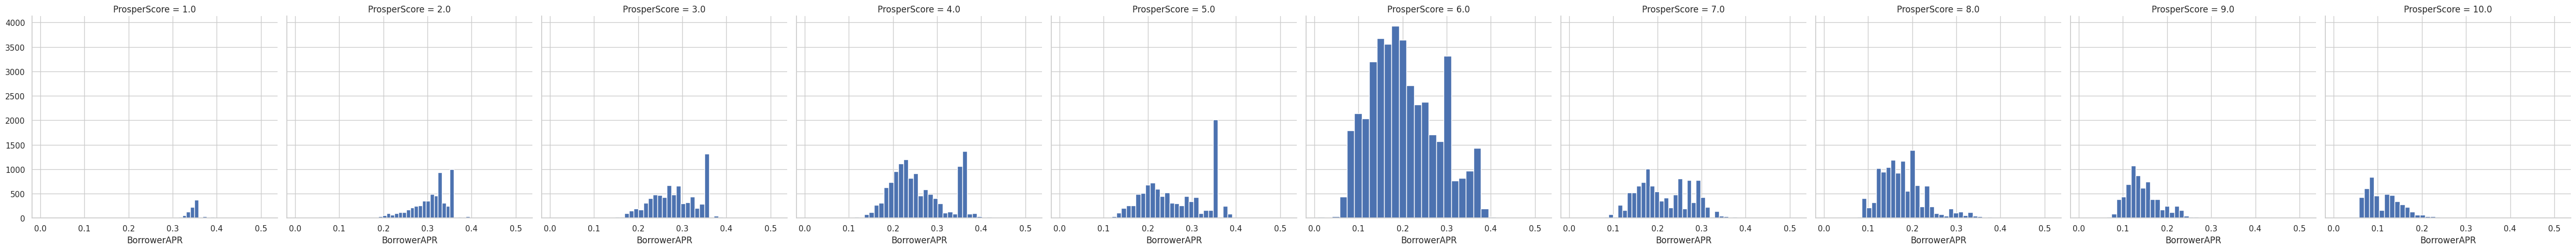

In [127]:
gg = sns.FacetGrid(df_exp_loanData, col='ProsperScore', height=5)
gg.map(plt.hist, 'BorrowerAPR', bins=30)
plt.show()

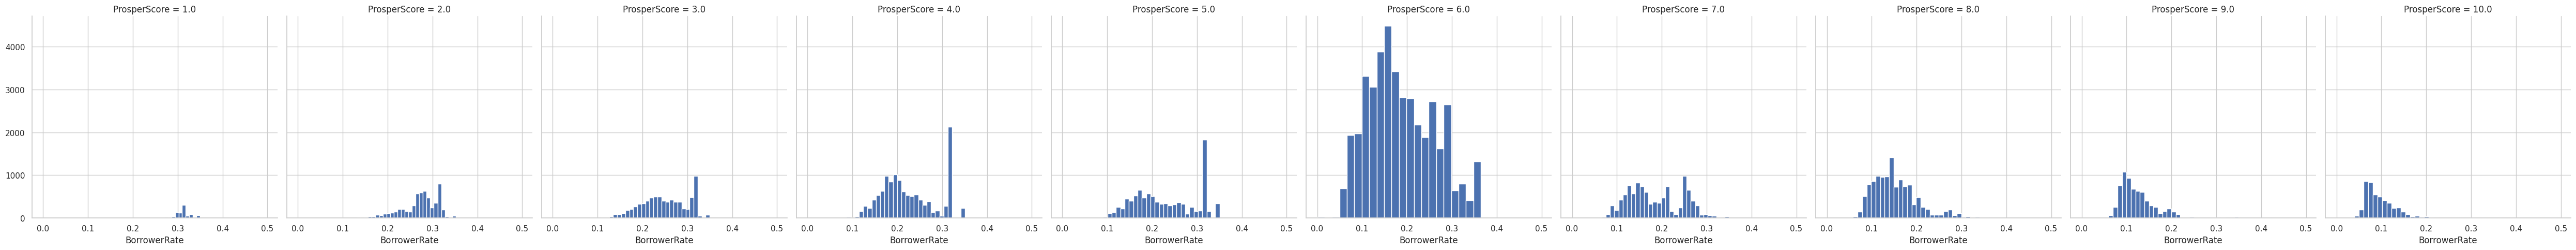

In [128]:
gg = sns.FacetGrid(df_exp_loanData, col='ProsperScore', height=5)
gg.map(plt.hist, 'BorrowerRate', bins=30)
plt.show()

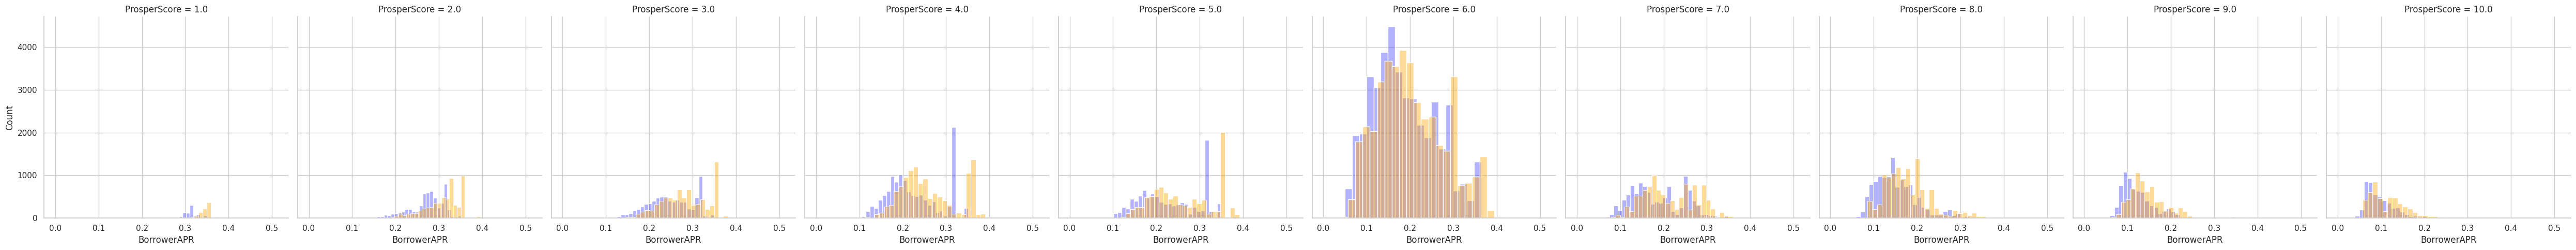

In [129]:
gg = sns.FacetGrid(df_exp_loanData, col='ProsperScore', height=5)
gg.map(sns.histplot, 'BorrowerRate', bins=30, color='blue', alpha=0.3)
gg.map(sns.histplot, 'BorrowerAPR', bins=30, color='orange', alpha=0.4)
plt.show()

High Prosper Rate has low BorrowerRate and BorrowerAPR.

# Feature Engineering

In [130]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df_exp_loanData.dtypes)

ListingKey                                     object
ListingNumber                                   int64
ListingCreationDate                            object
CreditGrade                                    object
Term                                            int64
LoanStatus                                     object
ClosedDate                             datetime64[ns]
BorrowerAPR                                   float64
BorrowerRate                                  float64
LenderYield                                   float64
EstimatedEffectiveYield                       float64
EstimatedLoss                                 float64
EstimatedReturn                               float64
ProsperRating (numeric)                       float64
ProsperRating (Alpha)                          object
ProsperScore                                  float64
ListingCategory (numeric)                       int64
BorrowerState                                  object
Occupation                  

In [131]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Check all null values
null_count = df_exp_loanData.isnull().sum()
null_count

ListingKey                                 0
ListingNumber                              0
ListingCreationDate                        0
CreditGrade                                0
Term                                       0
LoanStatus                                 0
ClosedDate                             57990
BorrowerAPR                                0
BorrowerRate                               0
LenderYield                                0
EstimatedEffectiveYield                29079
EstimatedLoss                          29079
EstimatedReturn                        29079
ProsperRating (numeric)                29079
ProsperRating (Alpha)                  29079
ProsperScore                               0
ListingCategory (numeric)                  0
BorrowerState                           5512
Occupation                                 0
EmploymentStatus                           0
EmploymentStatusDuration                7621
IsBorrowerHomeowner                        0
CurrentlyI

In [132]:
categorical_columns = df_exp_loanData.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)

categorical_columns = df_exp_loanData.select_dtypes(include=['object']).columns

# Print null values in categorical columns
print("\nNull Values in Categorical Columns:")
print(df_exp_loanData[categorical_columns].isnull().sum())

Categorical Columns:
Index(['ListingKey', 'ListingCreationDate', 'CreditGrade', 'LoanStatus',
       'ProsperRating (Alpha)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'GroupKey', 'DateCreditPulled',
       'FirstRecordedCreditLine', 'IncomeRange', 'LoanKey',
       'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey',
       'ListingCategory', 'LoanCurrentDaysDelinquent_Status_a',
       'ClosedDate_Status_a'],
      dtype='object')

Null Values in Categorical Columns:
ListingKey                                0
ListingCreationDate                       0
CreditGrade                               0
LoanStatus                                0
ProsperRating (Alpha)                 29079
BorrowerState                          5512
Occupation                                0
EmploymentStatus                          0
GroupKey                              99723
DateCreditPulled                          0
FirstRecordedCreditLine                 696
IncomeRange      

In [133]:
# Categorical data -> mode
col = ['ProsperRating (Alpha)','BorrowerState','FirstRecordedCreditLine', 'GroupKey']
for i in col:
    df_exp_loanData[i].fillna(df_exp_loanData[i].mode()[0], inplace=True)

In [134]:
categorical_columns = df_exp_loanData.select_dtypes(include=['object']).columns

# Print null values in categorical columns
print("\nNull Values in Categorical Columns:")
print(df_exp_loanData[categorical_columns].isnull().sum())


Null Values in Categorical Columns:
ListingKey                            0
ListingCreationDate                   0
CreditGrade                           0
LoanStatus                            0
ProsperRating (Alpha)                 0
BorrowerState                         0
Occupation                            0
EmploymentStatus                      0
GroupKey                              0
DateCreditPulled                      0
FirstRecordedCreditLine               0
IncomeRange                           0
LoanKey                               0
LoanOriginationDate                   0
LoanOriginationQuarter                0
MemberKey                             0
ListingCategory                       0
LoanCurrentDaysDelinquent_Status_a    0
ClosedDate_Status_a                   0
dtype: int64


In [135]:
num_columns = df_exp_loanData.select_dtypes(include=['int64']).columns

# Print null values in categorical columns
print("\nNull Values in Categorical Columns:")
print(df_exp_loanData[num_columns].isnull().sum())


Null Values in Categorical Columns:
ListingNumber                         0
Term                                  0
ListingCategory (numeric)             0
OpenRevolvingAccounts                 0
LoanCurrentDaysDelinquent             0
LoanMonthsSinceOrigination            0
LoanNumber                            0
LoanOriginalAmount                    0
Recommendations                       0
InvestmentFromFriendsCount            0
Investors                             0
LoanCurrentDaysDelinquent_Status_n    0
ClosedDate_Status_n                   0
AmountRange                           0
dtype: int64


In [136]:
float_columns = df_exp_loanData.select_dtypes(include=['float64']).columns
print(float_columns)

# Print null values in categorical columns
print("\nNull Values in Categorical Columns:")
print(df_exp_loanData[float_columns].isnull().sum())

Index(['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperScore', 'EmploymentStatusDuration', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'Prosper

In [137]:
# Numerical columns -> mean
col =['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperScore', 'EmploymentStatusDuration', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanFirstDefaultedCycleNumber', 'MonthlyLoanPayment',
       'LP_CustomerPayments', 'LP_CustomerPrincipalPayments',
       'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees',
       'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'PercentFunded',
       'InvestmentFromFriendsAmount']

for i in col:
    df_exp_loanData[i].fillna(df_exp_loanData[i].mean(), inplace=True)

In [138]:
float_columns = df_exp_loanData.select_dtypes(include=['float64']).columns

# Print null values in categorical columns
print("\nNull Values in Categorical Columns:")
print(df_exp_loanData[float_columns].isnull().sum())


Null Values in Categorical Columns:
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperScore                           0
EmploymentStatusDuration               0
CreditScoreRangeLower                  0
CreditScoreRangeUpper                  0
CurrentCreditLines                     0
OpenCreditLines                        0
TotalCreditLinespast7years             0
OpenRevolvingMonthlyPayment            0
InquiriesLast6Months                   0
TotalInquiries                         0
CurrentDelinquencies                   0
AmountDelinquent                       0
DelinquenciesLast7Years                0
PublicRecordsLast10Years               0
PublicRecordsLast12Months              0
RevolvingCreditBalance                 0
BankcardUtilization 

In [139]:
datetime_columns = df_exp_loanData.select_dtypes(include=['datetime64[ns]']).columns

# Print null values in datetime columns
print("\nNull Values in Categorical Columns:")
print(df_exp_loanData[datetime_columns].isnull().sum())


Null Values in Categorical Columns:
ClosedDate    57990
dtype: int64


In [140]:
df_exp_loanData['ClosedDate'].fillna('Loan not closed', inplace=True)

In [141]:
# Check if there are nulls
df_exp_loanData['ClosedDate'].isnull().sum()

0

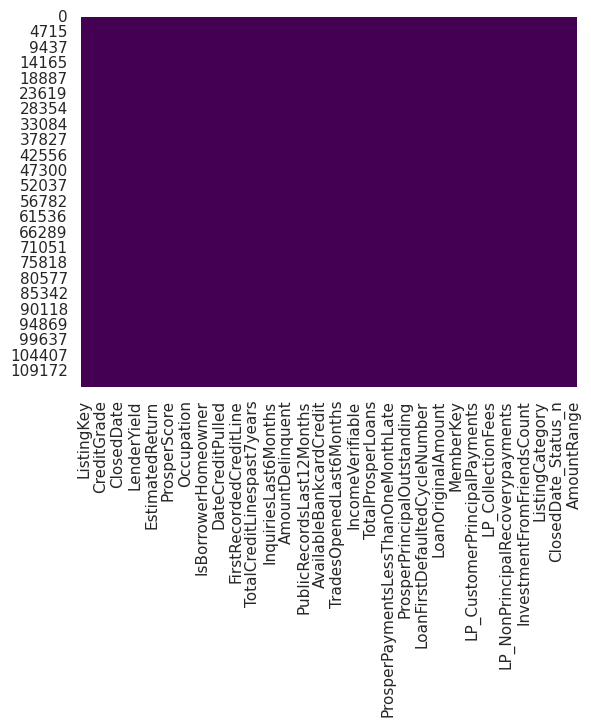

In [142]:
# Heat map of null values
sns.heatmap(df_exp_loanData.isnull(), cbar=False, cmap='viridis')
plt.show()

In [153]:
# Dropping columns
df_exp_loanData.drop(['ClosedDate', 'ListingKey', 'ListingNumber', 'ListingCreationDate' , 'GroupKey','DateCreditPulled', 'FirstRecordedCreditLine',
                      'LoanKey', 'LoanOriginationDate' , 'MemberKey' ], axis =1, inplace = True)
df_exp_loanData.head()

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCategory,LoanCurrentDaysDelinquent_Status_n,LoanCurrentDaysDelinquent_Status_a,ClosedDate_Status_n,ClosedDate_Status_a,MonthlyInc_Range,AmountRange
0,3,36,1,0.16516,0.1580,0.1380,0.16887,0.080417,0.096246,4.068705,3,6.0,0,5,35,6,2.00000,True,True,640.0,659.0,5.000000,4.000000,12.0,1,24.0,3.0,3.0,2.0,472.000000,4.0,0.0,0.000000,0.000000,0.000000,1500.000000,11.000000,0.810000,0.000000,0.17,3,True,3083.333333,1.420472,22.932263,22.269033,0.614514,0.048488,8452.830631,2929.190167,-3.229537,0,16.268464,78,19141,9425,17,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,13,0,1,0,0,1,1
1,3,36,2,0.12016,0.0920,0.0820,0.07960,0.024900,0.054700,6.000000,0,7.0,2,5,41,0,44.00000,False,False,680.0,699.0,14.000000,14.000000,29.0,13,389.0,3.0,5.0,0.0,0.000000,0.0,1.0,0.000000,3989.000000,0.210000,10266.000000,29.000000,1.000000,2.000000,0.18,4,True,6125.000000,1.420472,22.932263,22.269033,0.614514,0.048488,8452.830631,2929.190167,-3.229537,0,16.268464,0,134815,10000,7,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,8,0,1,1,1,1,2
2,6,36,1,0.28269,0.2750,0.2400,0.16887,0.080417,0.096246,4.068705,3,6.0,0,10,35,1,96.06121,False,True,480.0,499.0,10.307071,9.248357,3.0,0,0.0,0.0,1.0,1.0,986.827793,0.0,0.0,0.015209,17592.456301,0.561093,11208.179263,23.221596,0.885555,0.802096,0.06,6,True,2083.333333,1.420472,22.932263,22.269033,0.614514,0.048488,8452.830631,2929.190167,-3.229537,0,16.268464,86,6466,3001,1,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,13,0,1,0,0,1,0
3,3,36,2,0.12528,0.0974,0.0874,0.08490,0.024900,0.060000,6.000000,0,9.0,16,10,50,0,113.00000,True,False,800.0,819.0,5.000000,5.000000,29.0,7,115.0,0.0,1.0,4.0,10056.000000,14.0,0.0,0.000000,1444.000000,0.040000,30754.000000,26.000000,0.760000,0.000000,0.15,3,True,2875.000000,1.420472,22.932263,22.269033,0.614514,0.048488,8452.830631,2929.190167,-3.229537,0,16.268464,16,77296,10000,31,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,12,0,1,1,1,1,2
4,3,36,2,0.24614,0.2085,0.1985,0.18316,0.092500,0.090660,3.000000,4,4.0,2,23,19,0,44.00000,True,False,680.0,699.0,19.000000,19.000000,49.0,6,220.0,1.0,9.0,0.0,0.000000,0.0,0.0,0.000000,6193.000000,0.810000,695.000000,39.000000,0.950000,2.000000,0.26,2,True,9583.333333,1.000000,11.000000,11.000000,0.000000,0.000000,11000.000000,9947.900000,-3.229537,0,16.268464,6,102670,15000,23,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,8,0,1,1,1,1,3


In [154]:
from sklearn.preprocessing import LabelEncoder

# Categorical columns
categorical_col = ['CreditGrade', 'LoanStatus', 'ProsperRating (Alpha)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IncomeRange',
                   'LoanOriginationQuarter',  'ListingCategory',
                   'LoanCurrentDaysDelinquent_Status_a', 'ClosedDate_Status_a', 'MonthlyInc_Range']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode labels of multiple columns at once
df_exp_loanData[categorical_col] = df_exp_loanData[categorical_col].apply(LabelEncoder().fit_transform)

# Print head
df_exp_loanData.head()

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCategory,LoanCurrentDaysDelinquent_Status_n,LoanCurrentDaysDelinquent_Status_a,ClosedDate_Status_n,ClosedDate_Status_a,MonthlyInc_Range,AmountRange
0,3,36,1,0.16516,0.1580,0.1380,0.16887,0.080417,0.096246,4.068705,3,6.0,0,5,35,6,2.00000,True,True,640.0,659.0,5.000000,4.000000,12.0,1,24.0,3.0,3.0,2.0,472.000000,4.0,0.0,0.000000,0.000000,0.000000,1500.000000,11.000000,0.810000,0.000000,0.17,3,True,3083.333333,1.420472,22.932263,22.269033,0.614514,0.048488,8452.830631,2929.190167,-3.229537,0,16.268464,78,19141,9425,17,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,13,0,1,0,0,1,1
1,3,36,2,0.12016,0.0920,0.0820,0.07960,0.024900,0.054700,6.000000,0,7.0,2,5,41,0,44.00000,False,False,680.0,699.0,14.000000,14.000000,29.0,13,389.0,3.0,5.0,0.0,0.000000,0.0,1.0,0.000000,3989.000000,0.210000,10266.000000,29.000000,1.000000,2.000000,0.18,4,True,6125.000000,1.420472,22.932263,22.269033,0.614514,0.048488,8452.830631,2929.190167,-3.229537,0,16.268464,0,134815,10000,7,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,8,0,1,1,1,1,2
2,6,36,1,0.28269,0.2750,0.2400,0.16887,0.080417,0.096246,4.068705,3,6.0,0,10,35,1,96.06121,False,True,480.0,499.0,10.307071,9.248357,3.0,0,0.0,0.0,1.0,1.0,986.827793,0.0,0.0,0.015209,17592.456301,0.561093,11208.179263,23.221596,0.885555,0.802096,0.06,6,True,2083.333333,1.420472,22.932263,22.269033,0.614514,0.048488,8452.830631,2929.190167,-3.229537,0,16.268464,86,6466,3001,1,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,13,0,1,0,0,1,0
3,3,36,2,0.12528,0.0974,0.0874,0.08490,0.024900,0.060000,6.000000,0,9.0,16,10,50,0,113.00000,True,False,800.0,819.0,5.000000,5.000000,29.0,7,115.0,0.0,1.0,4.0,10056.000000,14.0,0.0,0.000000,1444.000000,0.040000,30754.000000,26.000000,0.760000,0.000000,0.15,3,True,2875.000000,1.420472,22.932263,22.269033,0.614514,0.048488,8452.830631,2929.190167,-3.229537,0,16.268464,16,77296,10000,31,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,12,0,1,1,1,1,2
4,3,36,2,0.24614,0.2085,0.1985,0.18316,0.092500,0.090660,3.000000,4,4.0,2,23,19,0,44.00000,True,False,680.0,699.0,19.000000,19.000000,49.0,6,220.0,1.0,9.0,0.0,0.000000,0.0,0.0,0.000000,6193.000000,0.810000,695.000000,39.000000,0.950000,2.000000,0.26,2,True,9583.333333,1.000000,11.000000,11.000000,0.000000,0.000000,11000.000000,9947.900000,-3.229537,0,16.268464,6,102670,15000,23,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,8,0,1,1,1,1,3


# PCA

In [155]:
# Copy of data
df_model = df_exp_loanData.copy()

In [156]:
# Display
df_model.head(10)

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCategory,LoanCurrentDaysDelinquent_Status_n,LoanCurrentDaysDelinquent_Status_a,ClosedDate_Status_n,ClosedDate_Status_a,MonthlyInc_Range,AmountRange
0,3,36,1,0.16516,0.1580,0.1380,0.16887,0.080417,0.096246,4.068705,3,6.0,0,5,35,6,2.00000,True,True,640.0,659.0,5.000000,4.000000,12.0,1,24.0,3.0,3.0,2.0,472.000000,4.0,0.0,0.000000,0.000000,0.000000,1500.000000,11.000000,0.810000,0.000000,0.17,3,True,3083.333333,1.420472,22.932263,22.269033,0.614514,0.048488,8452.830631,2929.190167,-3.229537,0,16.268464,78,19141,9425,17,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,13,0,1,0,0,1,1
1,3,36,2,0.12016,0.0920,0.0820,0.07960,0.024900,0.054700,6.000000,0,7.0,2,5,41,0,44.00000,False,False,680.0,699.0,14.000000,14.000000,29.0,13,389.0,3.0,5.0,0.0,0.000000,0.0,1.0,0.000000,3989.000000,0.210000,10266.000000,29.000000,1.000000,2.000000,0.18,4,True,6125.000000,1.420472,22.932263,22.269033,0.614514,0.048488,8452.830631,2929.190167,-3.229537,0,16.268464,0,134815,10000,7,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,8,0,1,1,1,1,2
2,6,36,1,0.28269,0.2750,0.2400,0.16887,0.080417,0.096246,4.068705,3,6.0,0,10,35,1,96.06121,False,True,480.0,499.0,10.307071,9.248357,3.0,0,0.0,0.0,1.0,1.0,986.827793,0.0,0.0,0.015209,17592.456301,0.561093,11208.179263,23.221596,0.885555,0.802096,0.06,6,True,2083.333333,1.420472,22.932263,22.269033,0.614514,0.048488,8452.830631,2929.190167,-3.229537,0,16.268464,86,6466,3001,1,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,13,0,1,0,0,1,0
3,3,36,2,0.12528,0.0974,0.0874,0.08490,0.024900,0.060000,6.000000,0,9.0,16,10,50,0,113.00000,True,False,800.0,819.0,5.000000,5.000000,29.0,7,115.0,0.0,1.0,4.0,10056.000000,14.0,0.0,0.000000,1444.000000,0.040000,30754.000000,26.000000,0.760000,0.000000,0.15,3,True,2875.000000,1.420472,22.932263,22.269033,0.614514,0.048488,8452.830631,2929.190167,-3.229537,0,16.268464,16,77296,10000,31,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,12,0,1,1,1,1,2
4,3,36,2,0.24614,0.2085,0.1985,0.18316,0.092500,0.090660,3.000000,4,4.0,2,23,19,0,44.00000,True,False,680.0,699.0,19.000000,19.000000,49.0,6,220.0,1.0,9.0,0.0,0.000000,0.0,0.0,0.000000,6193.000000,0.810000,695.000000,39.000000,0.950000,2.000000,0.26,2,True,9583.333333,1.000000,11.000000,11.000000,0.000000,0.000000,11000.000000,9947.900000,-3.229537,0,16.268464,6,102670,15000,23,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,8,0,1,1,1,1,3
5,3,60,2,0.15425,0.1314,0.1214,0.11567,0.044900,0.070770,5.000000,2,10.0,

In [147]:
# Select 'LoanCurrentDaysDelinquent_Status_n'
# 1 -> Defaulter
# 0 -> Not Defaulter

In [157]:
df_model['LoanCurrentDaysDelinquent_Status_n'].value_counts()

0    97998
1    15063
Name: LoanCurrentDaysDelinquent_Status_n, dtype: int64

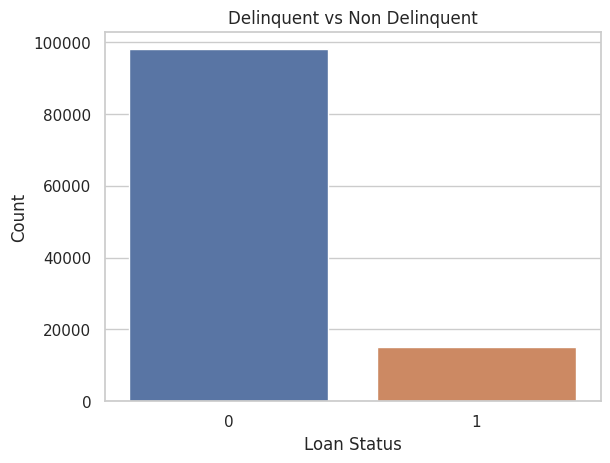

In [158]:
sns.countplot(x = 'LoanCurrentDaysDelinquent_Status_n', data=df_model )
plt.title("Delinquent vs Non Delinquent")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

In [159]:
# Apply Principle Componant Analysis
# Library
from sklearn.preprocessing import StandardScaler

In [160]:
X = df_model.drop('LoanCurrentDaysDelinquent_Status_n', axis=1)
y = df_model['LoanCurrentDaysDelinquent_Status_n']

In [161]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [162]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca=pca.fit_transform(scaled_data)

In [163]:
Variance_ratio = pca.explained_variance_ratio_
print(Variance_ratio)

[0.1312099  0.08296944 0.06801774 0.05307258 0.03955317 0.03815326
 0.03475572 0.02672258 0.02449908 0.02282343 0.02084122 0.01972046
 0.01930993 0.01744064 0.01705747 0.01648467 0.01582462 0.0152964
 0.01455839 0.01430464 0.01385337 0.01350533 0.01277174 0.01252801
 0.01217797 0.01208745 0.01175796 0.01149125 0.01133336 0.01107682
 0.01055752 0.01031859 0.00996513 0.00938175 0.00920712 0.00863496
 0.00846172 0.00817855 0.00753367 0.0073944  0.00726024 0.00658435
 0.00646464 0.00597068 0.00556238 0.00543704 0.00520993 0.00511293]


In [164]:
components = pca.n_components_
print(components)

48


In [165]:
X_pca.shape

(113061, 48)

# Model Building

# 1- Random Forest

1- Split the Data into training and testing sets

In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [167]:
X_train.shape, X_test.shape

((90448, 48), (22613, 48))

In [168]:
y_train.shape, y_test.shape

((90448,), (22613,))

2- Train a Random Forest Model

In [169]:
# Import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [170]:
# Create an instance of the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [171]:
# Train model using the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

3- Make Predictions

In [172]:
# Use the trained model to make predictions on the test set
predictions = rf_model.predict(X_test)

4- Evaluate Model Performance:

In [173]:
# Library
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [174]:
# Matrixes
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))


Accuracy: 0.993012868703843
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19523
           1       0.98      0.97      0.97      3090

    accuracy                           0.99     22613
   macro avg       0.99      0.98      0.99     22613
weighted avg       0.99      0.99      0.99     22613

Confusion Matrix:
[[19461    62]
 [   96  2994]]


# 2- Regularized Logistic Regression

In [175]:
# Library
from sklearn.linear_model import LogisticRegression

1- Create an instance of the logistic regression model with regularization.

In [176]:
# The C parameter controls the regularization strength, with smaller values indicating stronger regularization.
reg_logistic = LogisticRegression(penalty='l2', C=1.0, random_state=42)

2- Train the regularized logistic regression model on the training data

In [177]:
reg_logistic.fit(X_train, y_train)

LogisticRegression(random_state=42)

3- Use the trained model to make predictions on the test set

In [178]:
log_reg_predictions = reg_logistic.predict(X_test)

4- Evaluate Model Performance

In [179]:
# Library
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [180]:
accuracy = accuracy_score(y_test, log_reg_predictions)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, log_reg_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, log_reg_predictions))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19523
           1       1.00      1.00      1.00      3090

    accuracy                           1.00     22613
   macro avg       1.00      1.00      1.00     22613
weighted avg       1.00      1.00      1.00     22613

Confusion Matrix:
[[19523     0]
 [    0  3090]]


## Result
*   Random Forest Accuracy: 0.993
*   Regularized Logistic Regression Accuracy: 1.0